In [171]:
import pandas as pd
import os
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from IPython.display import Image
import csv
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
import tensorflow_hub as hub

In [3]:
#importing labels csv
labels = pd.read_csv("dog_breed/labels.csv")
print(labels.describe())
labels.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b2fad5b45f040f4bd58c907fc5b9983f  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
#Identifying how many images are there for each breed
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

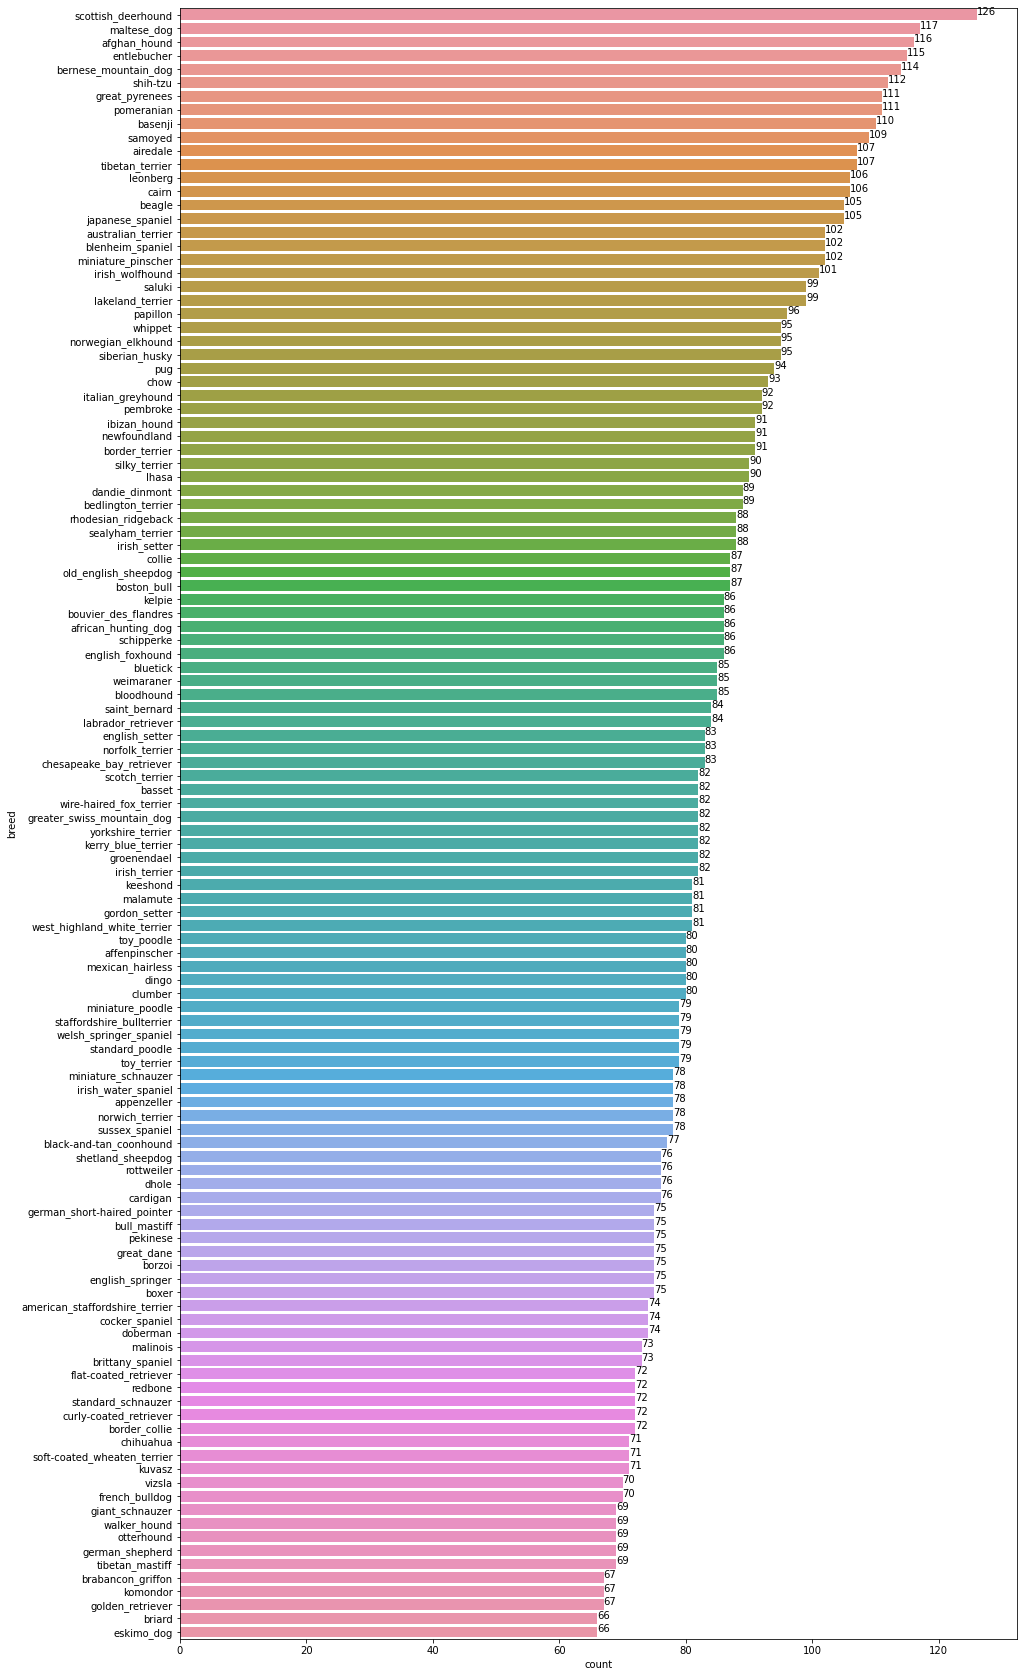

In [5]:
#Visualizing the counts
%config Inline_Backend.figure_format = 'retina'
%matplotlib inline

def bar_visualization(ax):
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x() + p.get_width() #x-position
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands
plt.figure(figsize = (15,30))
ax0 = sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)

bar_visualization(ax0)
plt.show()

In [6]:
#Create pathnames from file id's

filenames = ["dog_breed/train/" + iname+'.jpg' for iname in labels["id"]]
filenames[:10]

['dog_breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
#Validating if the number of filenames matches the number of Image files

if len(os.listdir("dog_breed/train/")) == len(filenames):
    print("the number of filenames matches the number of Image files! \nPlease Proceed.")
else:
    print("the number of filenames do not match with the number of Image files, please validate the data again")

the number of filenames matches the number of Image files! 
Please Proceed.


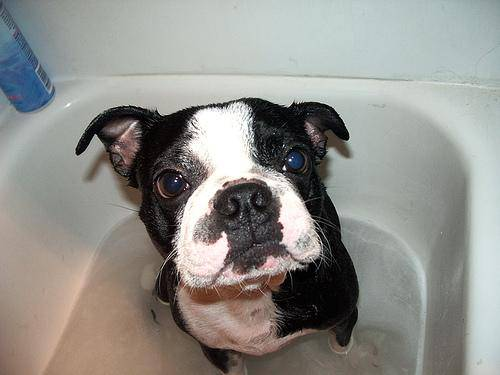

In [8]:
Image(filenames[10003])

In [9]:
#Preparation of Labels

labels_array = np.array(labels.breed)
labels_array

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
#Checking for missing data
#See if number of lables_array matches the number of filenames

if len(labels_array) == len(filenames):
    print('there are no missing data!')
else:
    print('there are some missing data.\nCheck for the missing data.')

there are no missing data!


ML models won't take strings as Input.
We need to convert the strings to numerical data

In [11]:
#Find the unique labels

unique_breeds = np.unique(labels_array)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [12]:
len(unique_breeds)

120

In [13]:
#Turning a single label into a Boolean array
print(labels_array[0])
labels_array[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
#from the unique_breeds array, boston bull appears in the 19th index(counted manually)

#We can confirm this with the numpy's where method to make sure we got that right

print(np.where(unique_breeds == labels_array[0]))

(array([19], dtype=int64),)


In [15]:
#Turn every label to a Boolean Array

boolean_array = [label == unique_breeds for label in labels_array]
boolean_array[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
#Example: Turning boolean array into integers

print(labels_array[45]) #selecting a random breed from labels_array
print(np.where(unique_breeds==labels_array[45])) #index where the breed corresponding to 45 occurs
print(boolean_array[45].argmax()) #index where the breed occurs in boolean array
print(boolean_array[45].astype(int)) #There should be a 1 where the sample label occurs

toy_poodle
(array([110], dtype=int64),)
110
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]


In [17]:
#Splitting data to test and train

#setting up the test, train paramenter

x = filenames
y = boolean_array

In [18]:
#Splitting data from sample into training and validation sets for a sample of 1000

X_train,X_val,y_train,y_val = train_test_split(x[:1000],y[:1000],test_size=0.2,random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [19]:
#Preprocessing Image(turning images into tensors)

#1.Take an Image Filepath as input
#2.Use TensorFlow to read the file and save it to a variable
#3.Turn the variable(a jpg) to tensors.
#4.Normalize our Image(convert the color channel values from 0-255 to 0-1)
#5.Resize the shape of image to (224,224)
#6.Return the modified image



In [20]:
#convert image to numpy array

Image = imread(filenames[42])
Image.shape

(257, 350, 3)

In [21]:
Image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [22]:
tf.constant(Image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [23]:
#Define Image Size
IMG_SIZE = 224

#Create a function for processing images

def process_image(image_path, img_size=IMG_SIZE):
    #read in an image file
    image = tf.io.read_file(image_path)
    #turn the variable into a tensor value with 3 color channels(red, Green and Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    #convert the color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    #resize the image to our desired value
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

In [24]:
process_image(filenames[22], img_size=224)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.1330032 , 0.05492197, 0.08260179],
        [0.12281288, 0.04473164, 0.07286915],
        [0.10271296, 0.02463172, 0.05307436],
        ...,
        [0.5843801 , 0.2659036 , 0.23074335],
        [0.42622918, 0.17718755, 0.12505569],
        [0.24508326, 0.04996776, 0.01638262]],

       [[0.4086272 , 0.375257  , 0.39908588],
        [0.36725003, 0.33319327, 0.35938936],
        [0.29389817, 0.25938374, 0.28715795],
        ...,
        [0.44133395, 0.20268634, 0.185602  ],
        [0.36695412, 0.16867074, 0.15405174],
        [0.2550185 , 0.08574145, 0.07356845]],

       [[0.56696117, 0.58506346, 0.6011555 ],
        [0.5850034 , 0.6031056 , 0.6203419 ],
        [0.5720782 , 0.59018046, 0.6081795 ],
        ...,
        [0.13036056, 0.00890197, 0.00958708],
        [0.24564041, 0.12379038, 0.15058532],
        [0.19309051, 0.06804112, 0.1088118 ]],

       ...,

       [[0.45460117, 0.4624443 , 0.1369541 ],
        [0.52

In [25]:
#Turning the data into batches
#Reason for processing batch of images is because if we process the entire 10000+ images then there could be a possibility of Running out of ram memory


In [26]:
#We will go with batch of 32 for this which is default for most DL models
#in order to use tensorflow effectively we need our data in form of tensor tuples which look like this
# (image,labels)

In [27]:
#Create a simple function to return a tuple(images,label)

def get_image_label(image_path, label):
    """Takes an image filepath name and associated label, processes the 
       image and returns a type of tuple(image,label)
    """
    image = process_image(image_path)
    return image, label

In [28]:
#Demo of the above
(process_image(x[20]), tf.constant(y[20]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.4686362 , 0.48284388, 0.4388923 ],
         [0.43491846, 0.46069017, 0.4125102 ],
         [0.45447832, 0.4979307 , 0.44302875],
         ...,
         [0.43456125, 0.5049195 , 0.28860298],
         [0.39823228, 0.4980573 , 0.26960978],
         [0.37409884, 0.48390275, 0.24988663]],
 
        [[0.43431306, 0.46279556, 0.4211807 ],
         [0.43068317, 0.4688092 , 0.42564145],
         [0.45039746, 0.49808303, 0.45071962],
         ...,
         [0.43917897, 0.51070905, 0.3056251 ],
         [0.3906706 , 0.4944172 , 0.2534024 ],
         [0.34645557, 0.4601811 , 0.20911317]],
 
        [[0.41501755, 0.4622952 , 0.4238247 ],
         [0.40084037, 0.4505865 , 0.40968493],
         [0.44426945, 0.4941148 , 0.45284492],
         ...,
         [0.4272146 , 0.50133634, 0.31526017],
         [0.38620418, 0.48767138, 0.25313336],
         [0.33333334, 0.44705886, 0.19360997]],
 
        ...,
 
        [[0.8738844 , 0.8699628 

In [29]:
#create a function to turn the tensor tuples into batches

In [186]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data_=False):
    """Creates batches of data out of image(X) and label(y) pairs
       Shuffles the data if it's training data, but doesn't shuffle
       if it's a Validation data.
       Also accepts test data as input(no labels).
    """
    #if the data is a test data, we probably don't require labels
    if test_data_:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    #if the data is a valid dataset,no requirement of shuffling is needed
    elif valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filename
                                                   tf.constant(y))) #labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        #get_image_label is called because it creates a tuple and also preprocesses the image
        return data_batch
    
    else:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filename
                                                   tf.constant(y))) #labels
        
        #before creating data batch, we need to shuffle pathnames and data for the entire Sample size we have considered(1000)
        data = data.shuffle(buffer_size=len(X))
        
        #create (image,label) tuple
        data = data.map(get_image_label)
        
        data_batch = data.batch(BATCH_SIZE)
        return data_batch
    

In [31]:
#create training and validation data batches

train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [32]:
#different attributes of the data batches

train_data.element_spec , valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [33]:
#Visualizing data batches

def show_20_images(images, labels):
    plt.figure(figsize=(15,15))
    for i in range(20):
        ax = plt.subplot(5, 4, i+1)  #i+1 because for plotting index starts at 1 at the upper left corner and moves right.
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')
        
        

In [34]:
#Unbacthing the data to visualize the data

#train_images, train_labels = next(train_data.as_numpy_iterator())

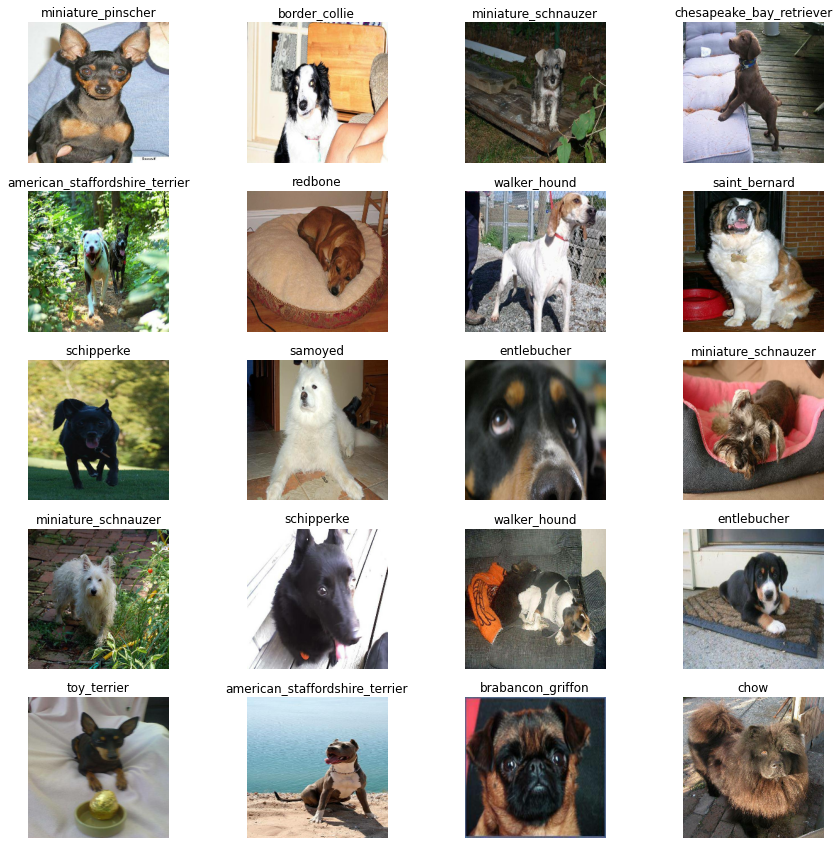

In [35]:
#Visualizing the training_data_batch

train_images, train_labels = next(train_data.as_numpy_iterator())
show_20_images(train_images, train_labels)

#every time this cell is run we get different set of images.
#This is because while creating data batches we defined training data in a way that will be shuffled across the 1000 samples that we took.


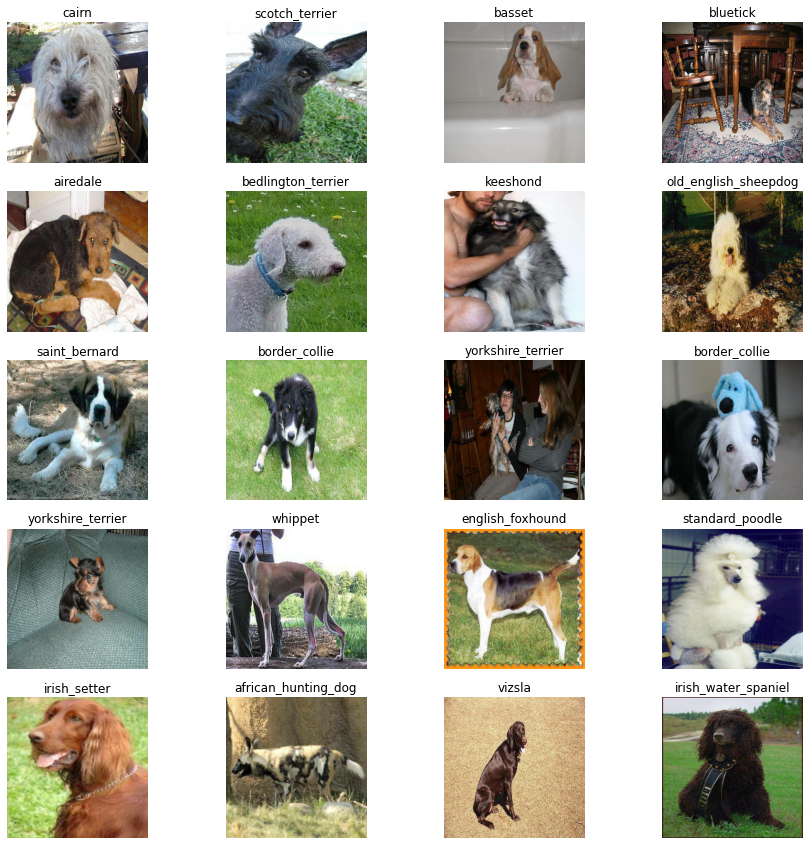

In [36]:
#Visualizing the validation data batch

val_images, val_labels = next(valid_data.as_numpy_iterator())
show_20_images(val_images, val_labels)

# 

In [37]:
#Before we build the model, there are few things that needs to be setup:

#1.Input Shape
#2.Output Shape
#3.URL of model we want to use from TensorFlow hub--https://tfhub.dev/tensorflow/resnet_50/classification/1


In [38]:
#setup input shape 
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  #batch,height,width,color channels

#Setup output shape
OUTPUT_SHAPE = len(unique_breeds)

#Model url
MODEL_URL = 'https://tfhub.dev/tensorflow/resnet_50/classification/1'

In [42]:
#Create a function which builds the Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("building model with model url:", MODEL_URL)
    #setup model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),                     #Layer 1(input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation='softmax')    #Layer 2(output layer)
    ])
    
    #compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer='rmsprop',
        metrics=[
                  'accuracy',
                  tf.keras.metrics.AUC(),
                ]
    )
    
    #build the model
    model.build(INPUT_SHAPE)
    
    return model


In [46]:
model = create_model()
model.summary()

building model with model url: https://tfhub.dev/tensorflow/resnet_50/classification/1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              25612201  
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 25,732,441
Trainable params: 120,240
Non-trainable params: 25,612,201
_________________________________________________________________


## Creating Call Backs

 Two call backs.
 
 One for TensorBoard to track our model progress and another for early stopping to 
 prevent our model from training too long


# TensorBoard Callbacks

1.Load the tensorboard extension.

2.Create a tensorboard callback which is able to create a log and pass it on to our model's fit() function

3.Visualize the training logs with %tensorboard magic function

In [49]:
#Load tensorboard notebook extension
%reload_ext tensorboard

In [51]:
#create a tensor board callback
def create_tensorboard_callback():
    #create a log directory to store tensorboard logs
    logdir = os.path.join('dog_breed/logs',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    
    return tf.keras.callbacks.TensorBoard(logdir)
    

# Early Stopping Callbacks

Early stopping helps stop out model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [52]:
#create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [53]:
#Training a model(on a subset of 1000 images).
#This is to make sure everything is working.
NUM_EPOCHS = 100


In [55]:
def train_model():
    #create a model
    model = create_model()
    
    #create new tensorboard session everytime we create a model
    tensorboard = create_tensorboard_callback()
    
    #fit the model to the data
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=valid_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    
    return model


In [56]:
model = train_model()

building model with model url: https://tfhub.dev/tensorflow/resnet_50/classification/1
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 4.7827 - accuracy: 0.0000e+00 - auc_1: 0.5000WARNING:tensorflow:From C:\Users\AkhilVNairNair\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 84s 3s/step - loss: 4.7752 - accuracy: 0.0712 - auc_1: 0.5000 - val_loss: 4.7675 - val_accuracy: 0.0900 - val_auc_1: 0.5000
Epoch 2/100
25/25 [==============================] - 83s 3s/step - loss: 4.7498 - accuracy: 0.2075 - auc_1: 0.5000 - val_loss: 4.7493 - val_accuracy: 0.2150 - val_auc_1: 0.5000
Epoch 3/100
25/25 [==============================] - 80s 3s/step - loss: 4.7270 - accuracy: 0.3038 - auc_1: 0.5000 - val_loss: 4.7315 - val_accuracy: 0.2250 - val_auc_1: 0.5000
Epoch 4/100
25/25 [==============================] - 84s 3s/step - loss: 4.7045 - accuracy: 0.3525 - auc_1: 0.5037 - val_loss: 4.7141 - val_accuracy: 0.2800 - val_auc_1: 0.5025
Epoch 5/100
25/25 [==============================] - 73s 3s/step - loss: 4.6822 - accuracy: 0.4062 - auc_1: 0.5368 - val_loss: 4.6967 - val_accuracy: 0.3250 - val_auc_1: 0.5399
Epoch 6/100
25/25 [==============================] - 75s 3s/step - loss: 4.6598 - accuracy: 0.4575 - auc_1: 0.5940 - val_loss: 

In [68]:
#Visualizing data with tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [73]:
predictions = model.predict(valid_data, verbose=1)

7/7 [==============================] - 17s 2s/step


In [84]:
predictions.shape
len(predictions)

200

In [75]:
predictions

array([[0.0089054 , 0.00925922, 0.00913777, ..., 0.00741969, 0.00793353,
        0.00943708],
       [0.01012376, 0.00918912, 0.00865517, ..., 0.00763921, 0.00778392,
        0.00848471],
       [0.00835237, 0.00905626, 0.00858255, ..., 0.00779141, 0.0076448 ,
        0.00932896],
       ...,
       [0.00827483, 0.00864183, 0.00924763, ..., 0.00792268, 0.00743912,
        0.00871365],
       [0.00884793, 0.00916626, 0.00876011, ..., 0.00752728, 0.00804643,
        0.00934262],
       [0.00840964, 0.00864518, 0.00851536, ..., 0.00767542, 0.00800152,
        0.00892768]], dtype=float32)

In [78]:
np.sum(predictions[1])

0.99999994

In [85]:
#First Prediction

index = 199
print(predictions[index])
print(f'Max Value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max Index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[0.00840964 0.00864518 0.00851536 0.00817122 0.00821268 0.00815802
 0.00885647 0.01042017 0.00887469 0.00807134 0.00857528 0.01094372
 0.00785189 0.00930459 0.00949299 0.00820237 0.00926664 0.00853436
 0.00720707 0.00943291 0.00865943 0.00843985 0.00701812 0.00797364
 0.0079432  0.00798429 0.00886406 0.01103337 0.00927901 0.00756624
 0.00789892 0.00858316 0.00777435 0.00989926 0.00769662 0.00677259
 0.00821448 0.0088697  0.00802971 0.00793006 0.00965913 0.00680048
 0.01019177 0.00741692 0.00787488 0.00732019 0.00754237 0.0080911
 0.00739508 0.00807024 0.0080484  0.00595656 0.00854407 0.00910748
 0.0086475  0.0081187  0.0088528  0.0091327  0.00765049 0.0090704
 0.00807907 0.00994914 0.00907105 0.00683486 0.00831002 0.00762628
 0.00888539 0.00888049 0.00951007 0.00902579 0.00859998 0.0093477
 0.00715087 0.00925158 0.00771954 0.00880875 0.00838923 0.00868358
 0.00799443 0.00746301 0.00831424 0.00775116 0.00845792 0.0078697
 0.0084598  0.00773054 0.00861918 0.00793839 0.00850434 0.00894355

In [86]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [87]:


# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]



(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [93]:
def plot_pred(prediction_probabilities, labels, images, n=42):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

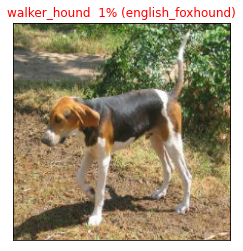

In [94]:


# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)



In [90]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

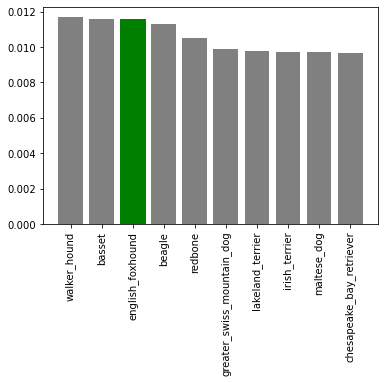

In [92]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=42)

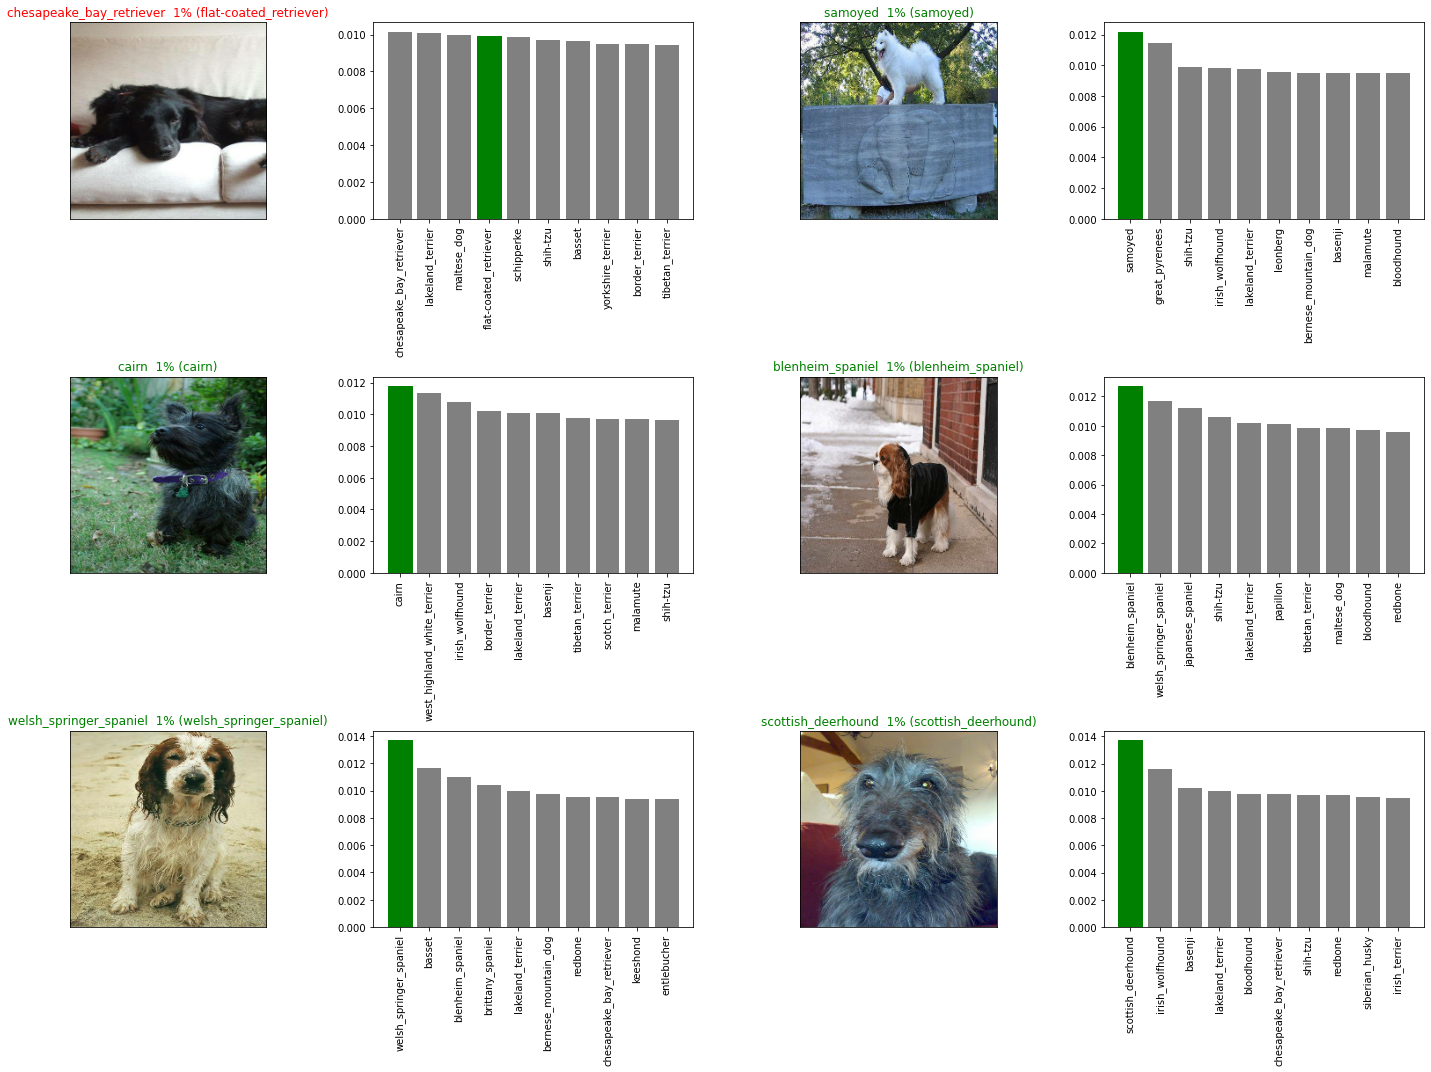

In [163]:
# Let's check a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [132]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join(r"C:\Users\AkhilVNairNair\projects\models", 
                          datetime.datetime.now().strftime("%m%d%Y-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [133]:


def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model



In [129]:
model

In [134]:
save_model(model, suffix="1000-images")

Saving model to: C:\Users\AkhilVNairNair\projects\models\03162021-055020-1000-images.h5...


'C:\\Users\\AkhilVNairNair\\projects\\models\\03162021-055020-1000-images.h5'

In [135]:
# Load our model trained on 1000 images
model_1000_images = load_model(r"C:\Users\AkhilVNairNair\projects\models\03162021-055020-1000-images.h5")

Loading saved model from: C:\Users\AkhilVNairNair\projects\models\03162021-055020-1000-images.h5


In [137]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 11s 2s/step - loss: 4.4872 - accuracy: 0.4800 - auc_1: 0.8406


[4.487246990203857, 0.47999998927116394, 0.840592622756958]

In [138]:
# Evaluate the loaded model
model_1000_images.evaluate(valid_data)

7/7 [==============================] - 11s 2s/step - loss: 4.4872 - accuracy: 0.4800 - auc_1: 0.8406


[4.487246990203857, 0.47999998927116394, 0.840592622756958]

In [140]:


# Turn full training data in a data batch
full_data = create_data_batches(x, y)



Creating training data batches...


In [141]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

building model with model url: https://tfhub.dev/tensorflow/resnet_50/classification/1


In [142]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [143]:


# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])



Epoch 1/100
  2/320 [..............................] - ETA: 46:45 - loss: 4.7755 - accuracy: 0.0312 - auc_2: 0.5000WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 2.0772s vs `on_train_batch_end` time: 15.5672s). Check your callbacks.


320/320 [==============================] - 837s 3s/step - loss: 4.6592 - accuracy: 0.4803 - auc_2: 0.6319
Epoch 2/100
320/320 [==============================] - 775s 2s/step - loss: 4.4199 - accuracy: 0.7616 - auc_2: 0.9522
Epoch 3/100
320/320 [==============================] - 806s 3s/step - loss: 4.1837 - accuracy: 0.8028 - auc_2: 0.9764
Epoch 4/100
320/320 [==============================] - 857s 3s/step - loss: 3.9499 - accuracy: 0.8263 - auc_2: 0.9856
Epoch 5/100
320/320 [==============================] - 880s 3s/step - loss: 3.7196 - accuracy: 0.8358 - auc_2: 0.9895
Epoch 6/100
320/320 [==============================] - 874s 3s/step - loss: 3.4927 - accuracy: 0.8433 - auc_2: 0.9912
Epoch 7/100
320/320 [==============================] - 872s 3s/step - loss: 3.2695 - accuracy: 0.8496 - auc_2: 0.9924
Epoch 8/100
320/320 [==============================] - 779s 2s/step - loss: 3.0512 - accuracy: 0.8532 - auc_2: 0.9932
Epoch 9/100
320/320 [==============================] - 774s 2s/step 

KeyboardInterrupt: 

### Interuppted the above model training because the test is running on CPU memory and ram being 16GB was taking a lot of time for each Epochs.

In [144]:
# Save model to file
save_model(full_model, suffix="all-images")

Saving model to: C:\Users\AkhilVNairNair\projects\models\03162021-131516-all-images.h5...


'C:\\Users\\AkhilVNairNair\\projects\\models\\03162021-131516-all-images.h5'

In [145]:
# Load in the full model
loaded_full_model = load_model(r"C:\Users\AkhilVNairNair\projects\models\03162021-131516-all-images.h5")

Loading saved model from: C:\Users\AkhilVNairNair\projects\models\03162021-131516-all-images.h5



# Making predictions on the test dataset

## Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

To make predictions on the test data, we'll:

    >Get the test image filenames.
    >Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).
    >Make a predictions array by passing the test data batches to the predict() function.



In [150]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "dog_breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['dog_breed/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog_breed/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog_breed/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog_breed/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog_breed/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'dog_breed/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'dog_breed/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'dog_breed/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'dog_breed/test/002f80396f1e3db687c5932d7978b196.jpg',
 'dog_breed/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [147]:
# How many test images are there?
len(test_filenames)

10357

In [151]:


# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)



Creating test data batches...


In [152]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 804s 2s/step


In [180]:
# Check out the test predictions
test_predictions[:10]


array([[0.00030821, 0.00015346, 0.00021257, ..., 0.00022565, 0.00028094,
        0.00024367],
       [0.00017142, 0.00012232, 0.00017194, ..., 0.00023964, 0.00021441,
        0.00016283],
       [0.00022343, 0.0002095 , 0.00026097, ..., 0.00057591, 0.00037608,
        0.00039401],
       ...,
       [0.00028766, 0.00020241, 0.00028996, ..., 0.00039782, 0.00035268,
        0.00027594],
       [0.00037423, 0.00105828, 0.00018918, ..., 0.00122575, 0.00019936,
        0.00017013],
       [0.00039208, 0.00038745, 0.00035453, ..., 0.00040556, 0.00047052,
        0.00037675]], dtype=float32)

# Preparing prediction Score for selected breeds

## First let's predict for all the breeds and then predict for the selected 10 breeds

In [197]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()



,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [199]:
# Append test image ID's to predictions DataFrame
test_path = "dog_breed/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.000308209,0.000153458,0.000212571,0.000184337,0.000218577,0.000219921,0.000228338,0.000185583,0.000187496,...,0.000246762,0.000243774,0.000215345,0.000207854,0.000189149,0.000201367,0.000209735,0.000225649,0.000280938,0.000243669
1,00102ee9d8eb90812350685311fe5890,0.00017142,0.000122322,0.000171939,0.000149056,0.000168279,0.000162852,0.000156105,0.000159735,0.000155902,...,0.000215203,0.00017914,0.00016225,0.000167097,0.000142008,0.000160872,0.000359202,0.000239642,0.000214408,0.000162831
2,0012a730dfa437f5f3613fb75efcd4ce,0.00022343,0.000209499,0.000260973,0.000162156,0.00051519,0.000508275,0.000202943,0.000164032,0.000377918,...,0.000214901,0.00036053,0.000174326,0.000812077,0.000283026,0.00188885,0.000342806,0.000575911,0.000376078,0.000394014
3,001510bc8570bbeee98c8d80c8a95ec1,0.00855673,0.00353169,0.00509747,0.00363899,0.00849602,0.0042233,0.00391718,0.00510017,0.00432796,...,0.0044868,0.0102469,0.00386498,0.0038821,0.00379964,0.00370074,0.00399995,0.00795496,0.00470604,0.00487363
4,001a5f3114548acdefa3d4da05474c2e,0.00208422,0.000635768,0.000299631,0.000232518,0.000335805,0.00029097,0.000640182,0.000262438,0.000282963,...,0.000869329,0.000302598,0.000245282,0.000249753,0.000231051,0.000258429,0.00064846,0.000338209,0.000601751,0.000482696


# Let's now predict for the given breeds

In [201]:
breeds=['id','beagle','chihuahua','doberman','french_bulldog', 'golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound',
        'tibetan_mastiff']

In [203]:
selected_breeds = preds_df.loc[:,breeds]
selected_breeds.head()

,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,0.000192851,0.000281971,0.000217943,0.00023872,0.000247275,0.000228555,0.000221876,0.00018288,0.000250535,0.000316639
1,00102ee9d8eb90812350685311fe5890,0.000156845,0.000193164,0.000194393,0.000179041,0.000201021,0.000228705,0.000207959,0.000140001,0.000186401,0.00026094
2,0012a730dfa437f5f3613fb75efcd4ce,0.000267905,0.000244065,0.000239693,0.000213384,0.000992557,0.000167059,0.000221545,0.000198505,0.000584423,0.000243048
3,001510bc8570bbeee98c8d80c8a95ec1,0.00388963,0.0126234,0.00448274,0.134956,0.00502157,0.00387962,0.201527,0.00349309,0.0048524,0.0069727
4,001a5f3114548acdefa3d4da05474c2e,0.000342804,0.00029249,0.000299106,0.000281205,0.000507351,0.000290235,0.000294141,0.000226854,0.000283361,0.00344371


In [204]:
selected_breeds.to_csv(r"C:\Users\AkhilVNairNair\projects\submission\selected_breeds_1_resnet.csv",
                       index=False)

In [205]:
preds_df.to_csv(r"C:\Users\AkhilVNairNair\projects\submission\all_breeds_1_resnet.csv",
                index=False)